In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
    
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import cx_rate
import plotter

In [3]:
mpl.rc('font', family='Arial', size=14)

In [4]:
nature_single = 89.0 / 25.4
nature_double = 183.0 / 25.4
nature_full = 247.0 / 25.4

label_font_size = 11
unit_font_size = 10

compass_colour = '#006836'
mem_colour = '#DE6F4A'
mem_colour_L = '#F37D4D'
mem_colour_R = '#FABD5E'
motor_colour = '#0071BB'
motor_colour_L = '#0071BB'
motor_colour_R = '#505AA5'

### Weight matrices
weight matrices between all cell populations.

/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


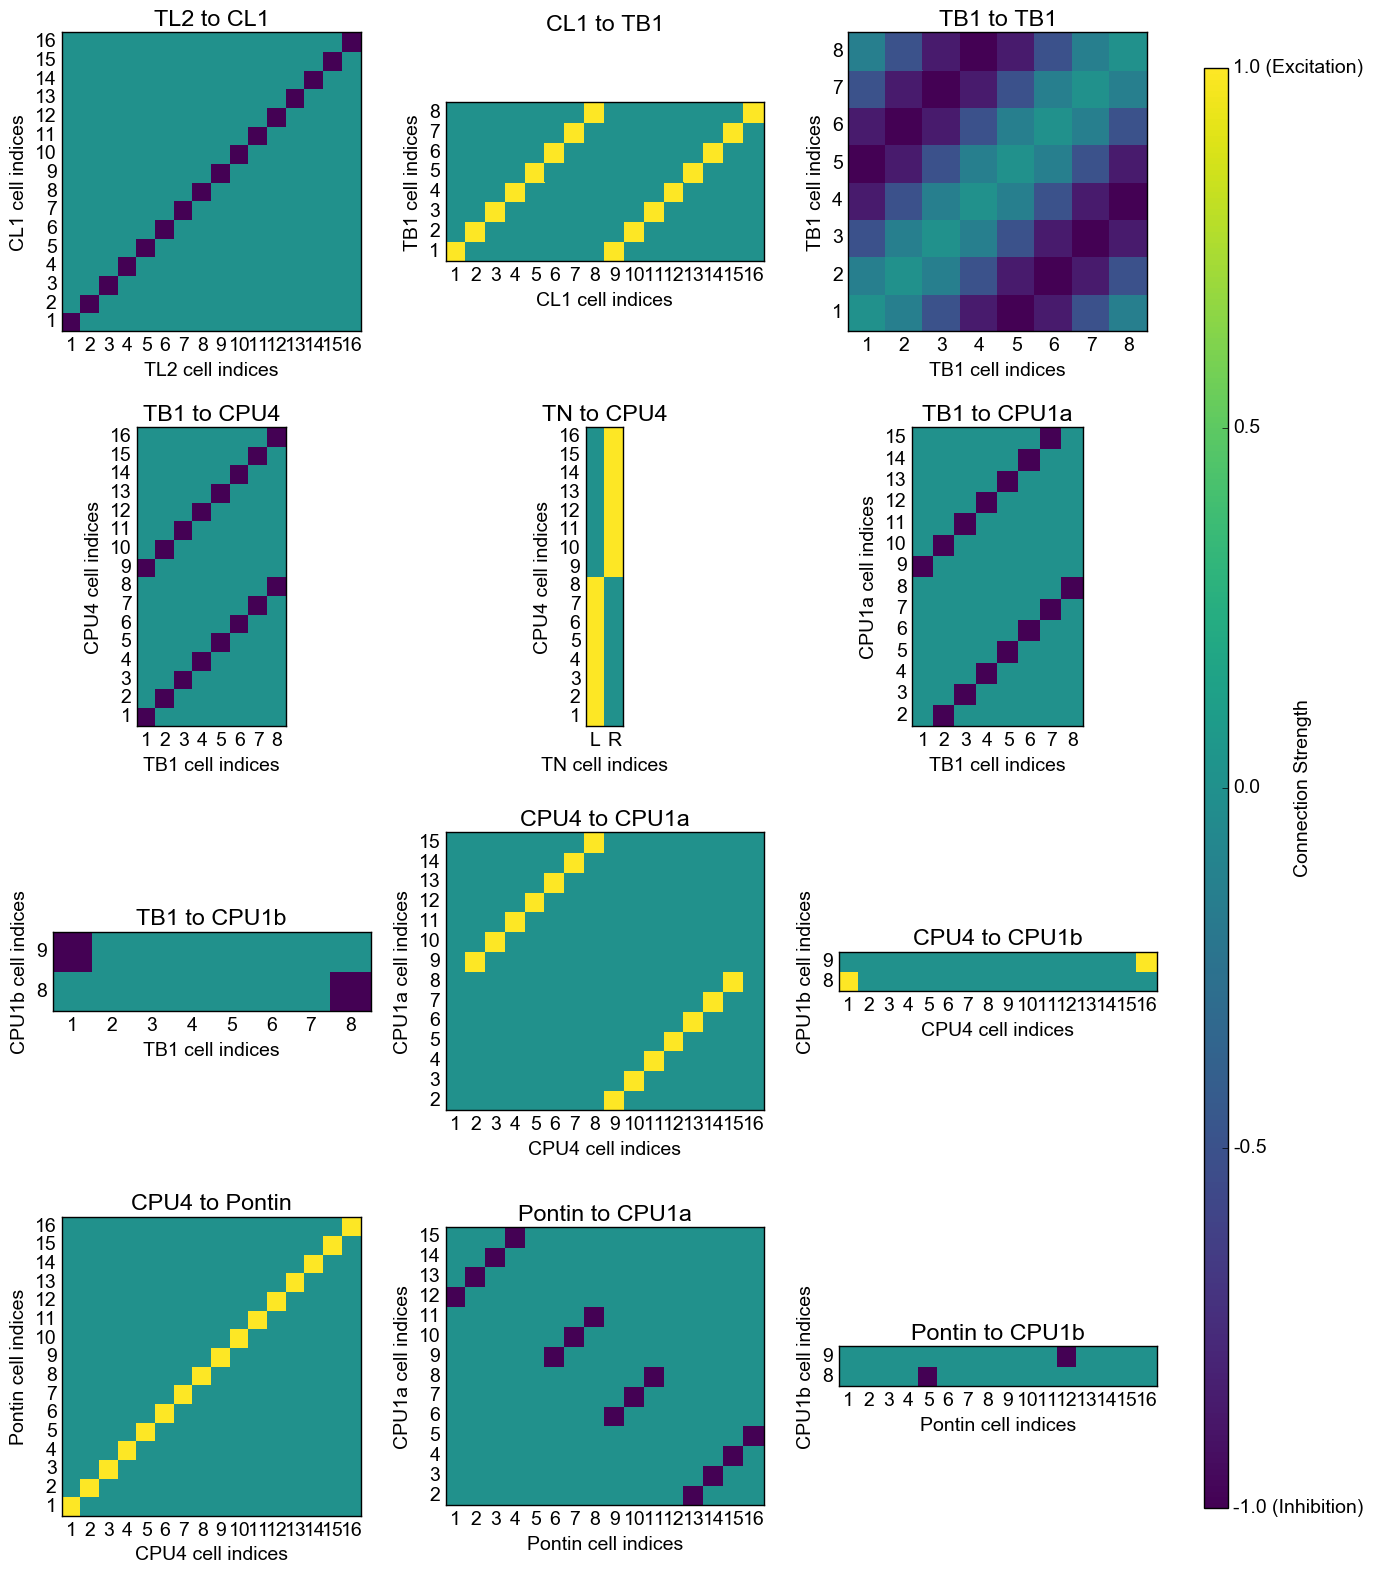

In [5]:
cxr = cx_rate.CXRatePontin()
fig, ax = plotter.plot_cxr_weights(cxr);
plotter.save_plot(fig, 'weights')

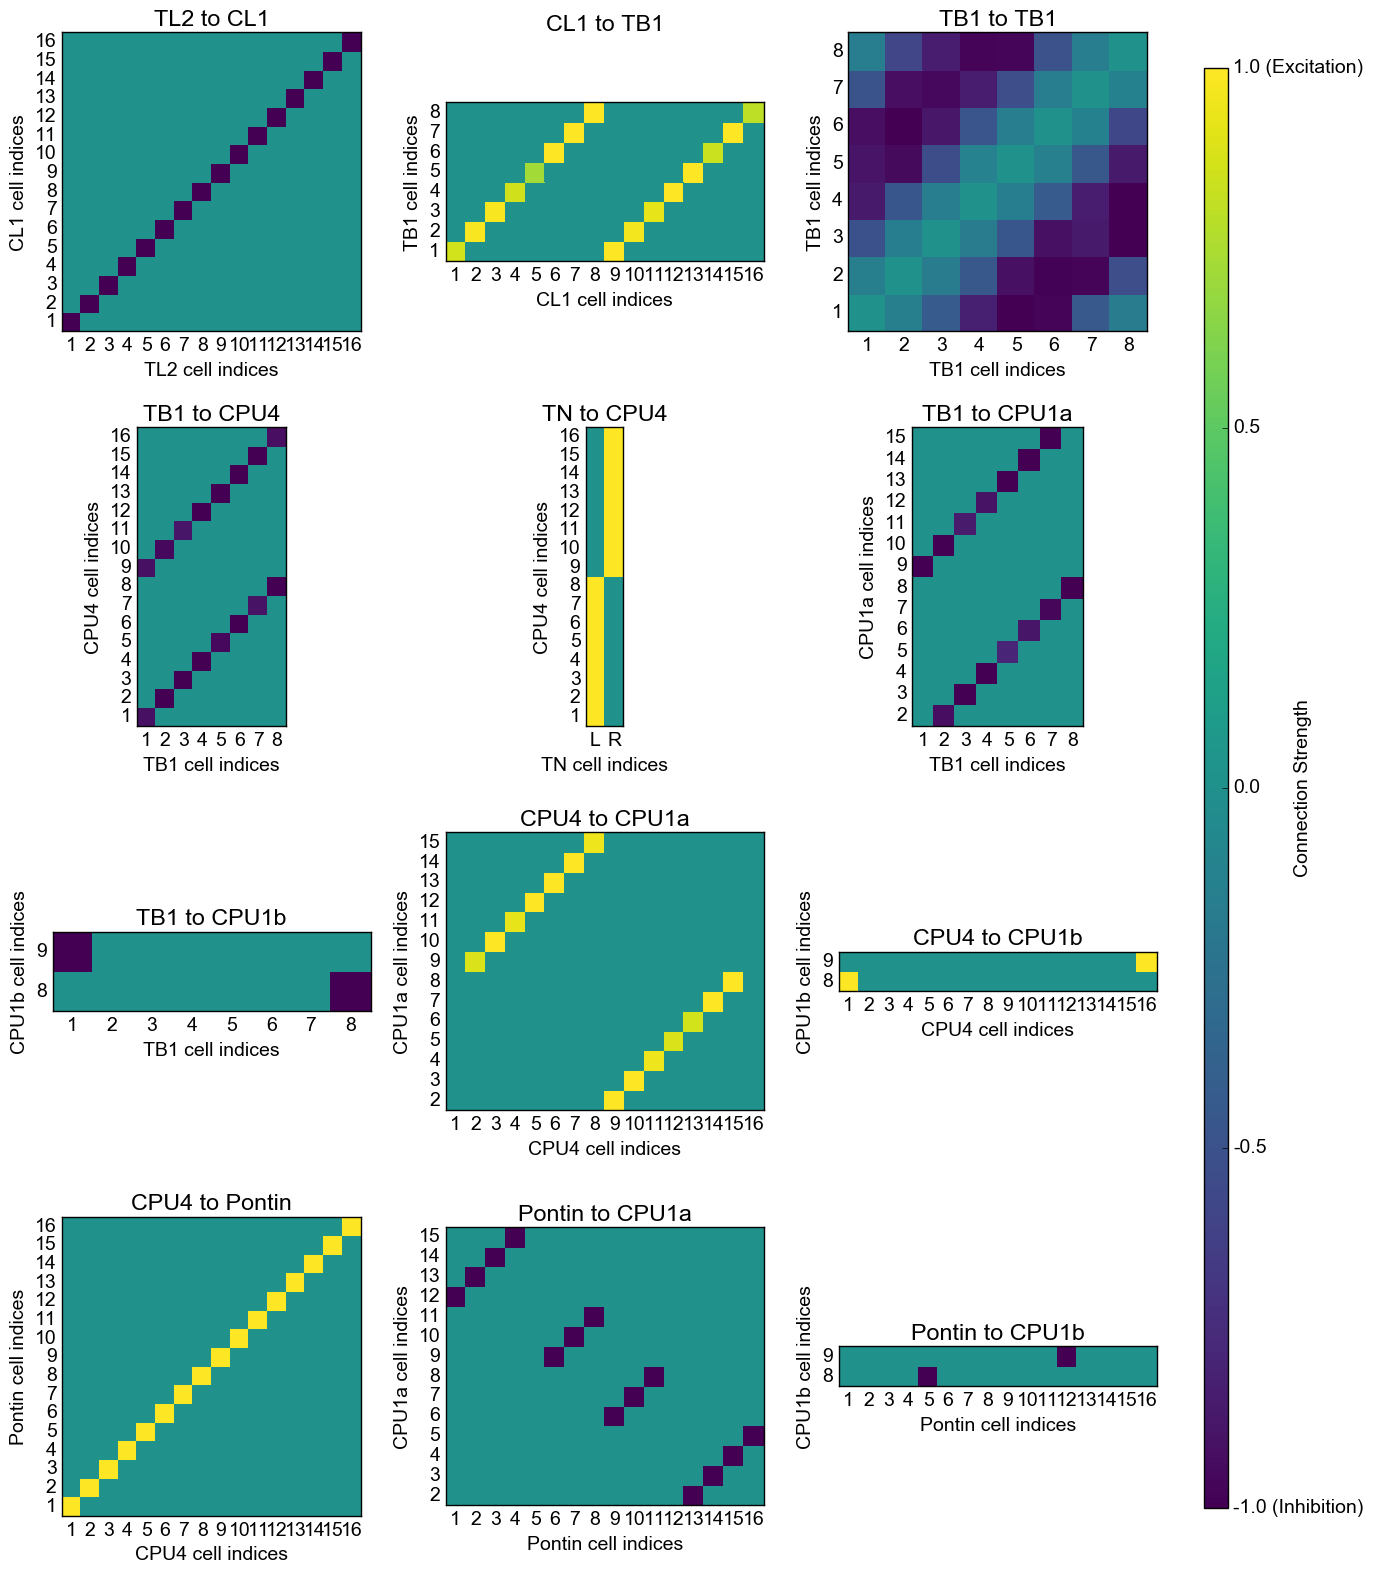

In [7]:
cxr_noisy_weights = cx_rate.CXRatePontin(weight_noise=0.1)
fig, ax = plotter.plot_cxr_weights(cxr_noisy_weights);
plotter.save_plot(fig, 'noisy_weights')

Just to get an intuition on how to slope, bias and noise affect our noisy sigmoids.

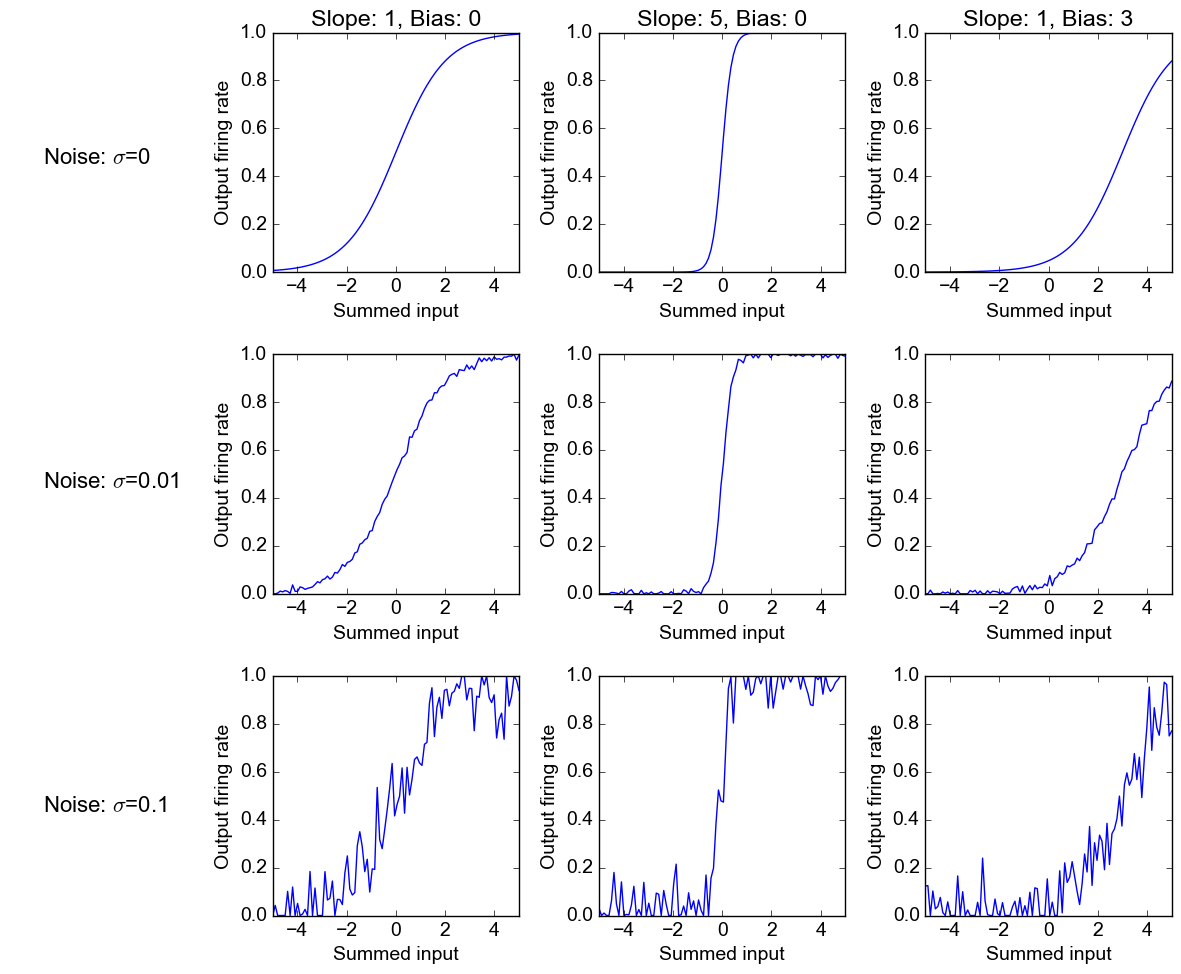

In [8]:
fig, ax = plt.subplots(3,3, figsize=(10,10))

noises = [0, 0.01, 0.1]
x_vals = np.linspace(-5., 5, 100)

for i in range(3):
    ax[i][0].plot(x_vals, cx_rate.noisy_sigmoid(x_vals, 1, 0, noise=noises[i]))
    ax[i][1].plot(x_vals, cx_rate.noisy_sigmoid(x_vals, 5, 0, noise=noises[i]))
    ax[i][2].plot(x_vals, cx_rate.noisy_sigmoid(x_vals, 1, 3, noise=noises[i]))
        
    for j in range(3):
        ax[i][j].set_xlim([-5,5])
        ax[i][j].set_ylim([0,1])
        ax[i][j].set_xlabel('Summed input')
        ax[i][j].set_ylabel('Output firing rate')
    
    if i == 0:
        ax[i][0].set_title('Slope: 1, Bias: 0')
        ax[i][1].set_title('Slope: 5, Bias: 0')
        ax[i][2].set_title('Slope: 1, Bias: 3')

noise_axes = fig.add_axes([-0.15, 0.05, 0.15, 0.9])
noise_axes.axis('off')
noise_axes.text(0, 0.86, 'Noise: $\sigma$=' + '0', fontsize=16)
noise_axes.text(0, 0.5, 'Noise: $\sigma$=' + '0.01', fontsize=16)
noise_axes.text(0, 0.14, 'Noise: $\sigma$=' + '0.1', fontsize=16)

plt.tight_layout()
fig.savefig('plots/sigmoids.pdf', bbox_extra_artists=(noise_axes,), bbox_inches='tight')

Here we should the tuned sigmoid function for each cell type

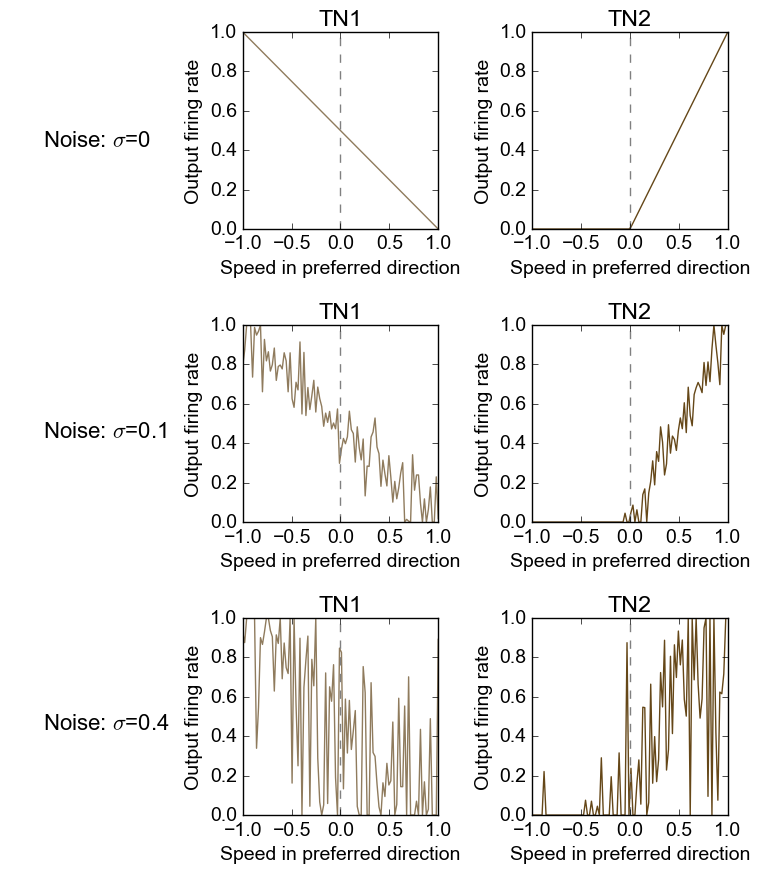

In [13]:
noise_levels = [0, 0.1, 0.4]
cell_types = ['TN1', 'TN2']
colors = ['#8F7B5D', '#654718']

fig, ax = plt.subplots(len(noise_levels), len(cell_types), figsize=(6,9))

for i, noise in enumerate(noise_levels):
    cxr = cx_rate.CXRate(noise=noise)
    funcs = [cxr.tn1_output, cxr.tn2_output]

    for j, cell_type in enumerate(cell_types):
        cax = ax[i][j%len(cell_types)]
        cax.plot(np.linspace(-1., 1, 100),
                 funcs[j](np.linspace(-1., 1, 100)),
                 color=colors[j])
        cax.set_xlim([-1.0, 1.0])
        cax.set_title(cell_type)
        cax.set_xlabel('Speed in preferred direction')
        cax.set_xticks(np.arange(-1, 1.5, 0.5))
        cax.set_ylabel('Output firing rate')
        cax.axvline(x=0, color='gray', ls='dashed')
        
        
noise_axes = fig.add_axes([-0.2, 0.05, 0.08, 0.9])
noise_axes.axis('off')
noise_axes.text(0, 0.86, 'Noise: $\sigma$=' + '0', fontsize=16)
noise_axes.text(0, 0.5, 'Noise: $\sigma$=' + '0.1', fontsize=16)
noise_axes.text(0, 0.14, 'Noise: $\sigma$=' + '0.4', fontsize=16)
    
plt.tight_layout()
#plotter.save_plot(fig, 'tn_response')
fig.savefig('plots/tn_response.pdf', bbox_extra_artists=(noise_axes,), bbox_inches='tight')
fig.savefig('plots/tn_response.svg', bbox_extra_artists=(noise_axes,), bbox_inches='tight')
fig.savefig('plots/tn_response.png', bbox_extra_artists=(noise_axes,), bbox_inches='tight')

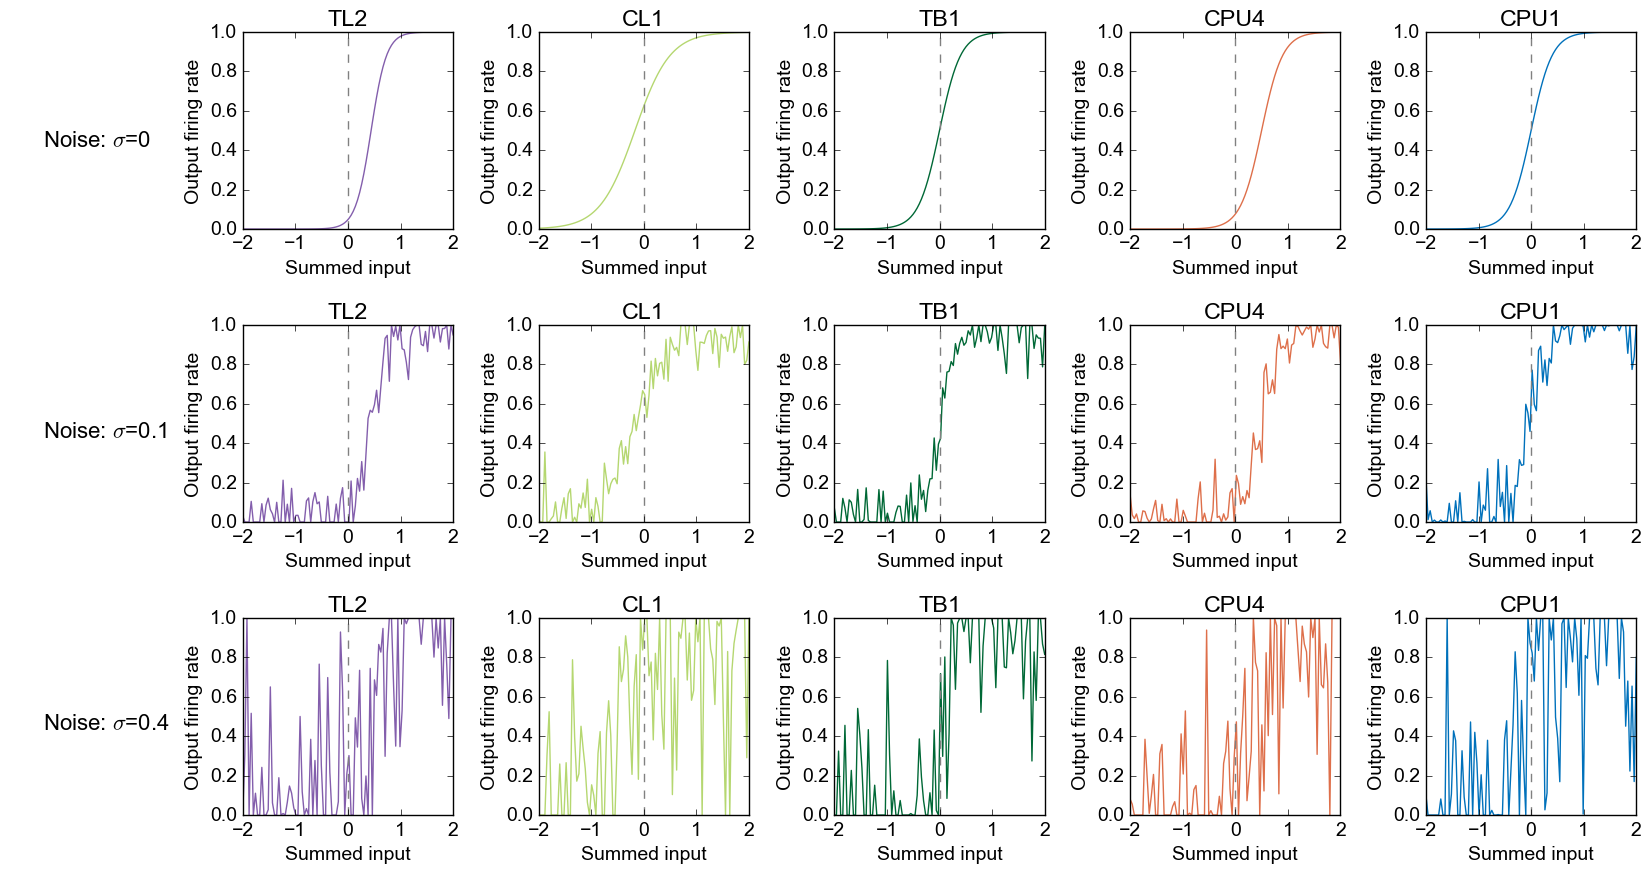

In [6]:
noise_levels = [0, 0.1, 0.4]
cell_types = ['TL2', 'CL1', 'TB1', 'CPU4', 'CPU1']
colors = ['#835EAC', '#B5D770', compass_colour, mem_colour, motor_colour]

slopes = [cx_rate.tl2_slope_tuned, cx_rate.cl1_slope_tuned,
          cx_rate.tb1_slope_tuned, cx_rate.cpu4_slope_tuned,
          cx_rate.cpu1_slope_tuned]

biases = [cx_rate.tl2_bias_tuned, cx_rate.cl1_bias_tuned,
          cx_rate.tb1_bias_tuned, cx_rate.cpu4_bias_tuned,
          cx_rate.cpu1_bias_tuned]

fig, ax = plt.subplots(len(noise_levels), len(cell_types), figsize=(15,9))

for i, noise in enumerate(noise_levels):
    for j, cell_type in enumerate(cell_types):
        cax = ax[i][j%len(cell_types)]
        cax.plot(np.linspace(-2., 2, 100),
                 cx_rate.noisy_sigmoid(np.linspace(-2., 2, 100),
                                       slopes[j],
                                       biases[j],
                                       noise=noise),
                 color=colors[j])

        cax.set_title(cell_type)
        cax.set_xlabel('Summed input')
        cax.set_xticks(np.arange(-2,3,1))
        cax.set_ylabel('Output firing rate')
        cax.axvline(x=0, color='gray', ls='dashed')
        
        
noise_axes = fig.add_axes([-0.08, 0.05, 0.08, 0.9])
noise_axes.axis('off')
noise_axes.text(0, 0.86, 'Noise: $\sigma$=' + '0', fontsize=16)
noise_axes.text(0, 0.5, 'Noise: $\sigma$=' + '0.1', fontsize=16)
noise_axes.text(0, 0.14, 'Noise: $\sigma$=' + '0.4', fontsize=16)
    
plt.tight_layout()
fig.savefig('plots/model_sigmoids.pdf', bbox_extra_artists=(noise_axes,), bbox_inches='tight')
fig.savefig('plots/model_sigmoids.svg', bbox_extra_artists=(noise_axes,), bbox_inches='tight')
fig.savefig('plots/model_sigmoids.png', bbox_extra_artists=(noise_axes,), bbox_inches='tight')